In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt
import time

from prettytable import PrettyTable

def creat_table(th, t_coordinates, y_coordinates, solve):
  td = []
  for i in range(0, len(t_coordinates), 10):
    td.append(t_coordinates[i])
    td.append(y_coordinates[i])
    td.append(solve(t_coordinates[i]))
    td.append(solve(t_coordinates[i]) - y_coordinates[i])

  columns = len(th)

  table = PrettyTable(th)

  while td:
    table.add_row(td[:columns])
    td = td[columns:]

  print(table)

Реализация метода Рунге-Кутта четвертого порядка

Пусть нам дано ДУ:

$y'(t) = t \cdot \sqrt{y}, \; y(0) = 1$

<!-- $t_0 = 0, y_0 = y(t_0) = y(0) = 1$ -->

Данное уравнение имеет решение

$y(t) = \frac{1}{16} \cdot (t^2 + 4)^2$

И у нас есть второе ДУ:

$y' + 2xy = xe^{-x^2}, \; y(0) = 1$

Решим эти два уравнения с помощью метода Рунге-Кутта

count iterates Runge-Kytta 100
count iterates Runge-Kytta 100
count iterates Runge-Kytta 4
count iterates Runge-Kytta 2
count iterates Runge-Kytta 1


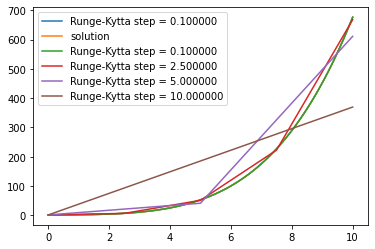

count iterates Runge-Kytta 50
count iterates Runge-Kytta 45
count iterates Runge-Kytta 30
count iterates Runge-Kytta 25


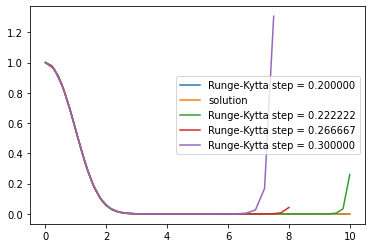

In [86]:
def function(t, y):
  return t * math.sqrt(y)

def RungeKyttaFourth(function, t0, y0, t1, n):
  t_coordinates = [0] * (n + 1)
  y_coordinates = [0] * (n + 1)
  step = (t1 - t0) / float(n)
  t_coordinates[0] = tn = t0
  y_coordinates[0] = yn = y0
  counter = 0
  for i in range(1, n + 1):
    k1 = step * function(tn, yn)
    k2 = step * function(tn + 0.5 * step, yn + 0.5 * k1)
    k3 = step * function(tn + 0.5 * step, yn + 0.5 * k2)
    k4 = step * function(tn + step, yn + k3)
    tn += step
    counter += 1
    t_coordinates[i] = tn
    y_coordinates[i] = yn = yn + (k1 + 2*k2 + 2*k3 + k4) / 6
  print("count iterates Runge-Kytta", counter)
  return t_coordinates, y_coordinates

def solve(t):
  return (t**2 + 4)**2/16

def draw_RungeKyttaFourth(function, start_t, start_y, end_t, n):
  t_coordinates, y_coordinates = RungeKyttaFourth(function, start_t, start_y, end_t, n)
  plt.plot(t_coordinates, y_coordinates, label="Runge-Kytta step = %f" %((end_t - start_t) / float(n)))
  return t_coordinates, y_coordinates

n = 100

t_coordinates, y_coordinates = draw_RungeKyttaFourth(function, 0, 1, 10, n)
# th = ["t", "Runge-Kytta", "solution", "error"]
# creat_table(th, t_coordinates, y_coordinates, solve)

y = [solve(x) for x in t_coordinates]
plt.plot(t_coordinates, y, label="solution")

draw_RungeKyttaFourth(function, 0, 1, 10, n)

draw_RungeKyttaFourth(function, 0, 1, 10, 4)

draw_RungeKyttaFourth(function, 0, 1, 10, 2)

draw_RungeKyttaFourth(function, 0, 1, 10, 1)

plt.legend()
plt.show()

def second_func(t, y):
  return t * math.exp(-t**2) - 2 * t * y

def second_solution(t):
  return math.exp(-t**2) / 2 * (t**2 + 2)

n = 50


t_coordinates, y_coordinates = draw_RungeKyttaFourth(second_func, 0, 1, 10, n)
# th = ["t", "Runge-Kytta", "solution", "error"]
# creat_table(th, t_coordinates, y_coordinates, second_solution)

y = [second_solution(x) for x in t_coordinates]
plt.plot(t_coordinates, y, label="solution")

draw_RungeKyttaFourth(second_func, 0, 1, 10, 45)

draw_RungeKyttaFourth(second_func, 0, 1, 8, 30)

draw_RungeKyttaFourth(second_func, 0, 1, 7.5, 25)

plt.legend()
plt.show()


Реализация метода Рунге-Кутта-Мерсона

count iterates Merson 18
count iterates Merson 18
count iterates Merson 14
count iterates Merson 10


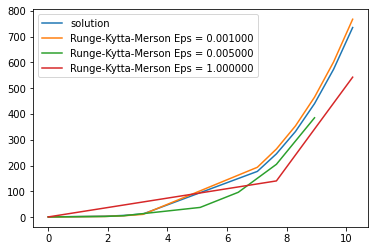

count iterates Merson 16
count iterates Merson 16
count iterates Merson 13
count iterates Merson 9


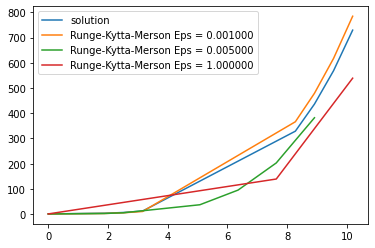

count iterates Merson 45


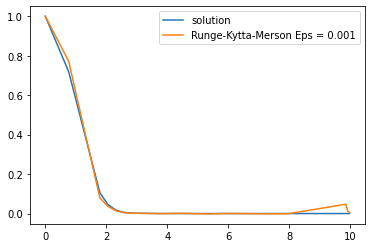

count iterates Merson 41


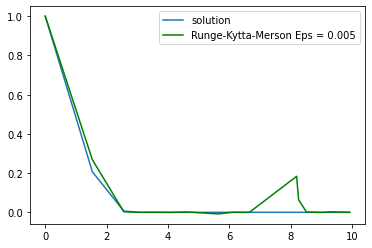

In [88]:
import math
def function(t, y):
  return t * math.sqrt(y)

def RungeKyttaMerson(function, t0, y0, t1, n, Eps):
  t_coordinates = []
  y_coordinates = []
  step = (t1 - t0) / float(n) 
  tn = t0
  t_coordinates.append(t0)
  yn = y0
  y_coordinates.append(y0)
  R = Eps
  counter = 0
  while tn <= t1:
    k1 = step * function(tn, yn)
    k2 = step * function(tn + step / 3, yn + k1 / 3)
    k3 = step * function(tn + step / 3, yn + k1 / 6 + k2 / 6)
    k4 = step * function(tn + step / 2, yn + k1 / 8 + 3 / 8 * k3)
    k5 = step * function(tn + step, yn + k1 / 2 - 3 / 2 * k3 + 2 * k4)
    yn = yn + (k1 + 4*k4 + k5) / 6
    R = (-2*k1 + 9 * k3 - 8*k4 + k5) / 30
    counter += 1
    if abs(R) > 5 * Eps:
      step = step / 2
    
    if abs(R) < Eps / 30:
      step = step * 2
    tn += step
    if abs(R) <= Eps and abs(R) >= Eps / 30:
      y_coordinates.append(yn)
      t_coordinates.append(tn)
  print("count iterates Merson", counter)
  return t_coordinates, y_coordinates

def solve(t):
  return (t**2 + 4)**2/16

def draw_RungeKyttaMerson(function, start_t, start_y, end_t, n, eps):
  t_coordinates, y_coordinates = RungeKyttaMerson(function, start_t, start_y, end_t, n, eps)
  plt.plot(t_coordinates, y_coordinates, label="Runge-Kytta-Merson Eps = %f" %(eps))
  return t_coordinates, y_coordinates

n = 1000
 
t_coordinates, y_coordinates = RungeKyttaMerson(function, 0, 1, 10, n, 0.001)
# th = ["t", "Runge-Kytta-Merson", "solution", "error"]
# creat_table(th, t_coordinates, y_coordinates, solve)

y = [solve(x) for x in t_coordinates]
plt.plot(t_coordinates, y, label="solution")

draw_RungeKyttaMerson(function, 0, 1, 10, n, 0.001)

draw_RungeKyttaMerson(function, 0, 1, 10, n, 0.005)

draw_RungeKyttaMerson(function, 0, 1, 10, n, 1)

plt.legend()
plt.show()

n = 500
 
t_coordinates, y_coordinates = RungeKyttaMerson(function, 0, 1, 10, n, 0.001)
# th = ["t", "Runge-Kytta-Merson", "solution", "error"]
# creat_table(th, t_coordinates, y_coordinates, solve)

y = [solve(x) for x in t_coordinates]
plt.plot(t_coordinates, y, label="solution")

draw_RungeKyttaMerson(function, 0, 1, 10, n, 0.001)

draw_RungeKyttaMerson(function, 0, 1, 10, n, 0.005)

draw_RungeKyttaMerson(function, 0, 1, 10, n, 1)

plt.legend()
plt.show()


def second_func(t, y):
  return t * math.exp(-t**2) - 2 * t * y

def second_solution(t):
  return math.exp(-t**2) / 2 * (t**2 + 2)

n = 10000

t_coordinates, y_coordinates = RungeKyttaMerson(second_func, 0, 1, 10, n, 0.001)
# th = ["t", "Runge-Kytta-Merson", "solution", "error"]
# creat_table(th, t_coordinates, y_coordinates, solve)

y = [second_solution(x) for x in t_coordinates]
plt.plot(t_coordinates, y, label="solution")
plt.plot(t_coordinates, y_coordinates, label="Runge-Kytta-Merson Eps = 0.001")

plt.legend()
plt.show()

n = 10000
 
t_coordinates, y_coordinates = RungeKyttaMerson(second_func, 0, 1, 10, n, 0.005)
# th = ["t", "Runge-Kytta-Merson", "solution", "error"]
# creat_table(th, t_coordinates, y_coordinates, solve)

y = [second_solution(x) for x in t_coordinates]
plt.plot(t_coordinates, y, label="solution")
plt.plot(t_coordinates, y_coordinates, label="Runge-Kytta-Merson Eps = 0.005", color='g')

plt.legend()
plt.show()

Реализация метода Рунге-Кутта-Фельдберга с автоматическим изменением шага

count iterates Felberg 636
count iterates Felberg 636
count iterates Felberg 301
count iterates Felberg 214


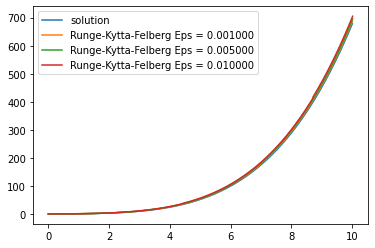

count iterates Felberg 75
count iterates Felberg 62
count iterates Felberg 35
count iterates Felberg 32


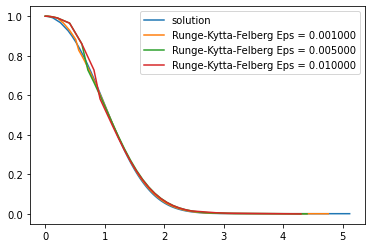

In [89]:
import math
def function(t, y):
  return t * math.sqrt(y)

def RungeKyttaFelberg(function, t0, y0, t1, n, Eps):
  t_coordinates = []
  y_coordinates = []
  step = (t1 - t0) / float(n) 
  tn = t0
  t_coordinates.append(t0)
  yn = y0
  y_coordinates.append(y0)
  counter = 0
  while tn <= t1:
    k1 = step * function(tn, yn)
    k2 = step * function(tn + 2 / 9  * step, yn + 2 / 9 * k1)
    k3 = step * function(tn + step / 3, yn + k1 / 12 + k2 / 4)
    k4 = step * function(tn + 3 / 4 * step,
                         yn + 69 / 128 * k1 - 143 / 128 * k2 + 135 / 64 * k3)
    k5 = step * function(tn + step,
                         yn - 17/12 * k1 + 27/4 * k2 - 27/5 * k3 + 16/15 * k4)
    k6 = step * function(tn + 5 / 6 * step,
  yn + 65 / 432 * k1 - 5 / 16 * k2 + 13 / 16 * k3 + 4 / 27 * k4 + 5 / 144 * k5)
    yn = yn + 1 / 9 * k1 + 9 / 20 * k3 + 16 / 45 * k4 + 1 / 12 * k5
    R = 1 / 150 * k1 - 3 / 100 * k3 + 16 / 75 * k4 + 1 / 20 * k5 - 6 / 25 * k6
    counter += 1
    if R > Eps:
      step = step / 2
    
    if R < Eps / 20:
      step = step * 2
    tn += step
    y_coordinates.append(yn)
    t_coordinates.append(tn)
  print("count iterates Felberg", counter)
  return t_coordinates, y_coordinates

def solve(t):
  return (t**2 + 4)**2/16

def draw_RungeKyttaFelberg(function, start_t, start_y, end_t, n, eps):
  t_coordinates, y_coordinates = RungeKyttaFelberg(function, start_t, start_y, end_t, n, eps)
  plt.plot(t_coordinates, y_coordinates, label="Runge-Kytta-Felberg Eps = %f" %(eps))
  return t_coordinates, y_coordinates

n = 1000
 
t_coordinates, y_coordinates = RungeKyttaFelberg(function, 0, 1, 10, n, 0.001)
th = ["t", "Runge-Kytta-Felberg", "solution", "error"]

# creat_table(th, t_coordinates, y_coordinates, solve)

y = [solve(x) for x in t_coordinates]
plt.plot(t_coordinates, y, label="solution")

draw_RungeKyttaFelberg(function, 0, 1, 10, n, 0.001)

draw_RungeKyttaFelberg(function, 0, 1, 10, n, 0.005)

draw_RungeKyttaFelberg(function, 0, 1, 10, n, 0.01)


plt.legend()
plt.show()

def second_func(t, y):
  return t * math.exp(-t**2) - 2 * t * y

def second_solution(t):
  return math.exp(-t**2) / 2 * (t**2 + 2)

n = 10000

t_coordinates, y_coordinates = RungeKyttaFelberg(second_func, 0, 1, 5, n, 0.001)
# th = ["t", "Runge-Kytta-Felberga", "solution", "error"]
# creat_table(th, t_coordinates, y_coordinates, second_solution)

y = [second_solution(x) for x in t_coordinates]
plt.plot(t_coordinates, y, label="solution")

draw_RungeKyttaFelberg(second_func, 0, 1, 4, n, 0.001)

draw_RungeKyttaFelberg(second_func, 0, 1, 4, n, 0.005)

draw_RungeKyttaFelberg(second_func, 0, 1, 4, n, 0.01)

plt.legend()
plt.show()

А теперь сделаем небольшие замеры

У нас есть три метода и два уравнения

Посчитаем время работы каждого метода

count iterates Runge-Kytta 10000
count iterates Merson 18
count iterates Felberg 636
+----------------------+------------------------+-----------------------+
|     Runge-Kytta      |   Runge-Kytta-Merson   |   RungeKyttaFelberga  |
+----------------------+------------------------+-----------------------+
| 0.014493942260742188 | 0.00010752677917480469 | 0.0022106170654296875 |
+----------------------+------------------------+-----------------------+


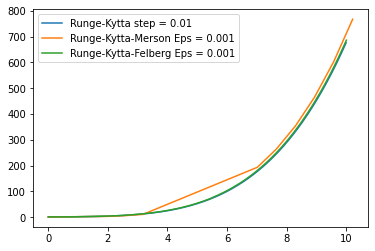

In [90]:
def function(t, y):
  return t * math.sqrt(y)
def check_time(function, start_t, start_y, end_t, eps):
  timer = []
  start = time.time()
  n = 10000
  first_t_coordinates, first_y_coordinates = RungeKyttaFourth(function, start_t, start_y, end_t, n)
  end = time.time()
  timer.append(end - start)
  n = 1000

  start = time.time()
  second_t_coordinates, second_y_coordinates = RungeKyttaMersona(function, start_t, start_y, end_t, n, eps)
  end = time.time()
  timer.append(end - start)

  start = time.time()
  third_t_coordinates, third_y_coordinates = RungeKyttaFelberga(function, start_t, start_y, end_t, n, eps)
  end = time.time()
  timer.append(end - start)

  th = ["Runge-Kytta", "Runge-Kytta-Merson", "RungeKyttaFelberga"]

  columns = len(th)

  table = PrettyTable(th)

  while timer:
    table.add_row(timer[:columns])
    timer = timer[columns:]

  print(table)

  plt.plot(first_t_coordinates, first_y_coordinates, label="Runge-Kytta step = 0.01")
  plt.plot(second_t_coordinates, second_y_coordinates, label="Runge-Kytta-Merson Eps = 0.001")
  plt.plot(third_t_coordinates, third_y_coordinates, label="Runge-Kytta-Felberg Eps = 0.001")

  plt.legend()
  plt.show()

check_time(function, 0, 1, 10, 0.001)

count iterates Runge-Ketta 10000
count iterates Merson 17
count iterates Felberg 68
+----------------------+------------------------+------------------------+
|     Runge-Kytta      |   Runge-Kytta-Merson   |   RungeKyttaFelberga   |
+----------------------+------------------------+------------------------+
| 0.018176794052124023 | 0.00011277198791503906 | 0.00029587745666503906 |
+----------------------+------------------------+------------------------+


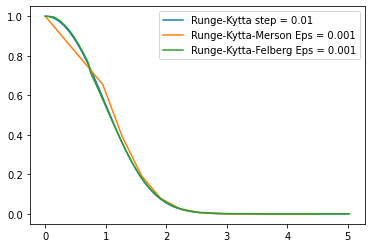

In [37]:
def second_func(t, y):
  return t * math.exp(-t**2) - 2 * t * y

check_time(second_func, 0, 1, 5, 0.001)